# Generative Adversarial Networks (GANs): 
# train a network to generate the MNIST data

There are many good tutorials, I suggest visiting this one: https://deeplearning4j.org/generative-adversarial-network

In this notebook, I'm going to implement GANs from Ian Goodfellow's paper: https://arxiv.org/abs/1406.2661

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


<img src = "GANs Algo.png"> 

In [3]:
#Build a autoencoder with deep neural network

def Generative_network(input_placeholder):
    with tf.variable_scope("G"):
        enc = tf.layers.dense(inputs = input_placeholder, units=128, activation= tf.nn.tanh, kernel_initializer= tf.contrib.layers.xavier_initializer())
        dec = tf.layers.dense(inputs = enc, units=784, activation= tf.nn.sigmoid)
    return dec

def Discriminative_network(input_placeholder):
    with tf.variable_scope("D"):
        layer = tf.layers.dense(inputs = input_placeholder, units = 128, activation = tf.nn.tanh, kernel_initializer= tf.contrib.layers.xavier_initializer())
        output = tf.layers.dense(inputs = layer, units = 1,activation=tf.nn.sigmoid)
    return output

In [4]:
with tf.variable_scope("scope") as scope:
    z = tf.placeholder(tf.float32, [None, 100], name= "random_noise") #Randomly sample with 100 dimension
    G = Generative_network(z)
    x = tf.placeholder(tf.float32, [None, 784], name= "pixels_input") 
    D_fake = Discriminative_network(G)
    scope.reuse_variables()
    D_real = Discriminative_network(x)

** Make sure that we train the right variables like the algorithm **

In [5]:
for j in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='scope/D'):
    print (j)   # i.name if you want just a name

<tf.Variable 'scope/D/dense/kernel:0' shape=(784, 128) dtype=float32_ref>
<tf.Variable 'scope/D/dense/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'scope/D/dense_1/kernel:0' shape=(128, 1) dtype=float32_ref>
<tf.Variable 'scope/D/dense_1/bias:0' shape=(1,) dtype=float32_ref>


In [6]:
for j in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='scope/G'):
    print (j)   # i.name if you want just a name

<tf.Variable 'scope/G/dense/kernel:0' shape=(100, 128) dtype=float32_ref>
<tf.Variable 'scope/G/dense/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'scope/G/dense_1/kernel:0' shape=(128, 784) dtype=float32_ref>
<tf.Variable 'scope/G/dense_1/bias:0' shape=(784,) dtype=float32_ref>


***For more reason about loss 2 and other GANs training tips, visit: https://github.com/soumith/ganhacks 
You can plot 2 functions log(1-x) and -log(x) to see the different in gradient when x approaches infinity.***

In [7]:
learning_rate = 0.001
#loss function 1:
loss1 = -tf.reduce_mean(tf.log(D_real) + tf.log(1.0 - D_fake))
#loss function 2:
loss2 = -tf.reduce_mean(tf.log(D_fake)) #The same meaning, but this function is better for optimization

var1 = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='scope/G')
var2 = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='scope/D')

update_dis = tf.train.AdamOptimizer(learning_rate).minimize(loss1, var_list = var2)
update_gen = tf.train.AdamOptimizer(learning_rate).minimize(loss2, var_list = var1 )

In [8]:
var1

[<tf.Variable 'scope/G/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'scope/G/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'scope/G/dense_1/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'scope/G/dense_1/bias:0' shape=(784,) dtype=float32_ref>]

In [9]:
var2

[<tf.Variable 'scope/D/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'scope/D/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'scope/D/dense_1/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'scope/D/dense_1/bias:0' shape=(1,) dtype=float32_ref>]

** Begin training, everything is implemented according to the algorithm above **

Iteration:  0
Discriminator loss:  1.41292
Generator loss:  3.29447


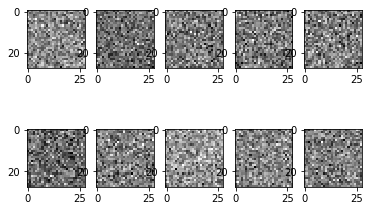

Iteration:  1000
Discriminator loss:  0.0690695
Generator loss:  4.15063


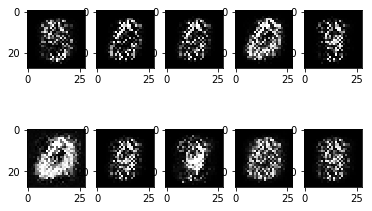

Iteration:  2000
Discriminator loss:  0.220451
Generator loss:  3.57999


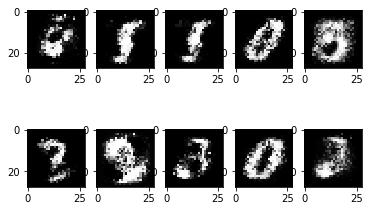

Iteration:  3000
Discriminator loss:  0.29472
Generator loss:  3.34436


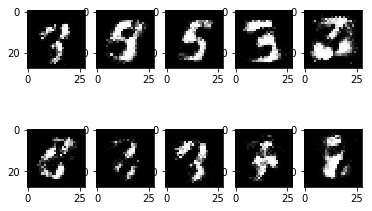

Iteration:  4000
Discriminator loss:  0.247049
Generator loss:  3.23613


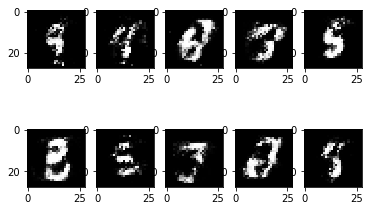

Iteration:  5000
Discriminator loss:  0.389668
Generator loss:  3.34998


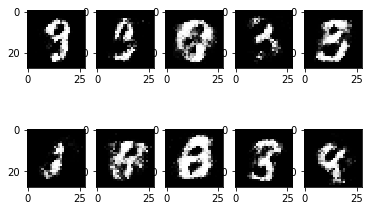

Iteration:  6000
Discriminator loss:  0.297146
Generator loss:  3.67973


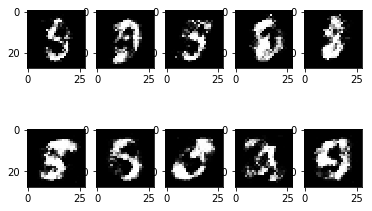

Iteration:  7000
Discriminator loss:  0.235981
Generator loss:  3.91978


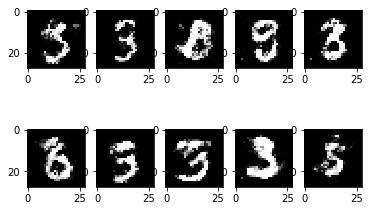

Iteration:  8000
Discriminator loss:  0.345445
Generator loss:  3.88857


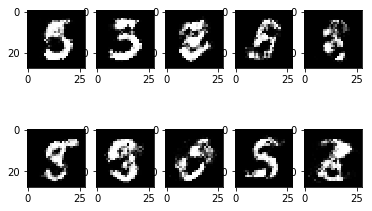

Iteration:  9000
Discriminator loss:  0.200493
Generator loss:  4.4457


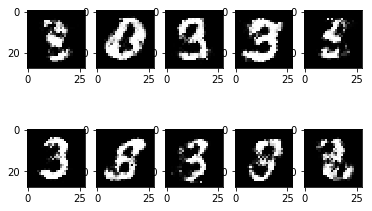

Iteration:  10000
Discriminator loss:  0.245495
Generator loss:  3.74568


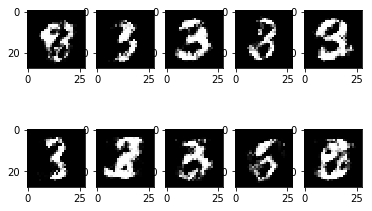

In [10]:
init = tf.global_variables_initializer()

training_iters = 10000
k_step = 1
m = 128
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_iters):
        for k in range(k_step):
            #Sample m noise sample:
            noise_sample = np.random.uniform(-1., 1., size=[m, 100])
            #Sample m examples from data distribution:
            X_data,Y_data = mnist.train.next_batch(m)
            #Update the discriminator
            _, val_loss1 = sess.run([update_dis, loss1], feed_dict = {z : noise_sample, x: X_data})
        #Sample m noise sample:
        noise_sample = np.random.uniform(-1., 1., size=[m, 100])
        #Update the generator:
        _, val_loss2 = sess.run([update_gen, loss2], feed_dict = {z : noise_sample})
        ## Plotting section ##
        if (i== 0):
            print ('Iteration: ', i)
            print ('Discriminator loss: ', val_loss1)
            print ('Generator loss: ', val_loss2)
            for draw in range(10):
                z0 = np.random.uniform(-1., 1., size=[1, 100])
                out = sess.run([G], feed_dict={z : z0})
                img = out[0].reshape(28,28)
                plt.subplot(2,5,draw+1)
                plt.imshow(img, cmap='gray')
            plt.show()
        
        if ((i+1)%1000 == 0):
            print ('Iteration: ', i+1)
            print ('Discriminator loss: ', val_loss1)
            print ('Generator loss: ', val_loss2)
            for draw in range(10):
                z0 = np.random.uniform(-1., 1., size=[1, 100])
                out = sess.run([G], feed_dict={z : z0})
                img = out[0].reshape(28,28)
                plt.subplot(2,5,draw+1)
                plt.imshow(img, cmap='gray')
            plt.show()

# DONE!!! (it costs me one day for figuring out my mistake when training)

It will be a good idea to plot the loss function....